<a href="https://colab.research.google.com/github/SalmanOkz/data_warehouse_work/blob/main/practice_lab_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [26]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
data = pd.read_csv(url)

In [27]:
df = pd.DataFrame(data)

In [28]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [29]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [30]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [31]:
X = df[['total_bill','tip']]

In [32]:
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster']=kmeans.fit_predict(X)

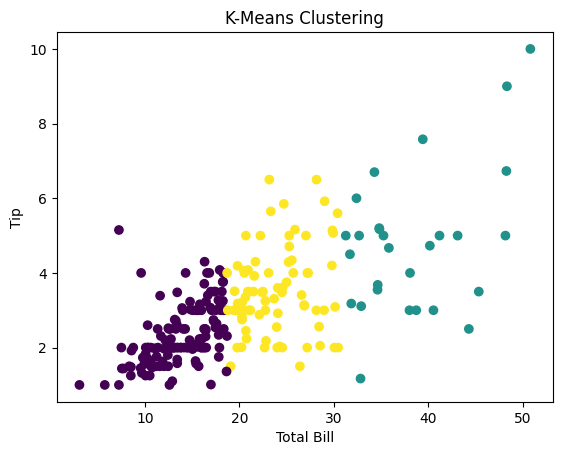

In [33]:
plt.scatter(X['total_bill'],X['tip'],c=df['cluster'],cmap='viridis')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('K-Means Clustering')
plt.show()

In [34]:
df['tip'] = df['tip'].fillna(df['tip'].mean())

In [35]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,cluster
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,2
3,23.68,3.31,Male,No,Sun,Dinner,2,2
4,24.59,3.61,Female,No,Sun,Dinner,4,2


In [45]:
import pandas as pd
import numpy as np

# Sample DataFrame with missing values (NaN)
data = {'A': [1, 2, np.nan, 4],
        'B': [np.nan, 5, np.nan, 8],
        'C': [1, np.nan, np.nan, np.nan],
        'D': [4, 5, 6, 7]}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)
print("-" * 30)

log_s = np.log(df['A'])
print(log_s)

# Calculate the minimum required number of non-null values to keep a row
# thresh = 50% of total columns
thresh_value = len(df.columns) * 0.5

# Drop rows with more than 50% missing values
df_cleaned_rows = df.dropna(thresh=thresh_value, axis=0)

print("DataFrame after dropping rows with >50% missing values:")
print(df_cleaned_rows)


Original DataFrame:
     A    B    C  D
0  1.0  NaN  1.0  4
1  2.0  5.0  NaN  5
2  NaN  NaN  NaN  6
3  4.0  8.0  NaN  7
------------------------------
0    0.000000
1    0.693147
2         NaN
3    1.386294
Name: A, dtype: float64
DataFrame after dropping rows with >50% missing values:
     A    B    C  D
0  1.0  NaN  1.0  4
1  2.0  5.0  NaN  5
3  4.0  8.0  NaN  7


In [37]:
# Assuming the same 'df' as above

print("Original DataFrame:")
print(df)
print("-" * 30)

# Calculate the minimum required number of non-null values to keep a column
# thresh = 50% of total rows
thresh_value = len(df) * 0.5

# Drop columns with more than 50% missing values
df_cleaned_cols = df.dropna(thresh=thresh_value, axis=1)

print("DataFrame after dropping columns with >50% missing values:")
print(df_cleaned_cols)


Original DataFrame:
     A    B    C  D
0  1.0  NaN  1.0  4
1  2.0  5.0  NaN  5
2  NaN  NaN  NaN  6
3  4.0  8.0  NaN  7
------------------------------
DataFrame after dropping columns with >50% missing values:
     A    B  D
0  1.0  NaN  4
1  2.0  5.0  5
2  NaN  NaN  6
3  4.0  8.0  7


In [38]:
import numpy as np


In [39]:

log_x = np.log(df['A'])

In [40]:
log_x

,A
0,0.000000
1,0.693147
2,NaN
3,1.386294


In [42]:
log_y = np.log(df['D'])

### Log Transformation and Feature Engineering

I will now apply a log transformation to a numerical feature and create a new categorical feature based on another numerical feature in the current sample DataFrame `df`.

In [46]:
import numpy as np

# Apply log transformation to 'A' and create 'Log_A'
df['Log_A'] = np.log(df['A'])

# Display the DataFrame with the new 'Log_A' column
print("DataFrame after Log Transformation on 'A':")
print(df)
print("-" * 30)

DataFrame after Log Transformation on 'A':
     A    B    C  D     Log_A
0  1.0  NaN  1.0  4  0.000000
1  2.0  5.0  NaN  5  0.693147
2  NaN  NaN  NaN  6       NaN
3  4.0  8.0  NaN  7  1.386294
------------------------------


In [47]:
# Create a new categorical feature 'D_Category' based on 'D'
def categorize_D(value):
    if value <= 5:
        return 'Low'
    elif 5 < value <= 6:
        return 'Medium'
    else:
        return 'High'

df['D_Category'] = df['D'].apply(categorize_D)

# Display the final DataFrame with all new columns
print("DataFrame after Feature Engineering on 'D':")
display(df)

DataFrame after Feature Engineering on 'D':


,A,B,C,D,Log_A,D_Category
0,1.0,NaN,1.0,4,0.000000,Low
1,2.0,5.0,NaN,5,0.693147,Low
2,NaN,NaN,NaN,6,NaN,Medium
3,4.0,8.0,NaN,7,1.386294,High


In [48]:
def some(value):
  if value <= 5:
    return 'Low'
  else:
    return 'High'

df['some'] = df['A'].apply(some)

In [50]:
df.head()

,A,B,C,D,Log_A,D_Category,some
0,1.0,NaN,1.0,4,0.000000,Low,Low
1,2.0,5.0,NaN,5,0.693147,Low,Low
2,NaN,NaN,NaN,6,NaN,Medium,High
3,4.0,8.0,NaN,7,1.386294,High,Low


In [51]:
import pandas as pd
import numpy as np

# Sample Data
data = {'Product': ['A', 'B', np.nan, 'C', 'A'],
        'Color': ['Red', np.nan, 'Blue', 'Red', np.nan]}
df = pd.DataFrame(data)

# Fill missing values in 'Color' with 'Unknown'
df['Color'] = df['Color'].fillna('Unknown')

print(df)


  Product    Color
0       A      Red
1       B  Unknown
2     NaN     Blue
3       C      Red
4       A  Unknown


# Task
Create a DataFrame named `df_employee` with columns 'Salary', 'Age', and 'Department', including missing values in all three columns.

## Create Dummy Data

### Subtask:
Generate a sample DataFrame with numerical columns ('Salary', 'Age') and a categorical column ('Department'), including some missing values to demonstrate data cleaning steps.


**Reasoning**:
The subtask requires generating a sample DataFrame with numerical and categorical columns, including missing values. I will import the necessary libraries, create a dictionary with sample data and missing values, then convert it to a pandas DataFrame, and finally display its head.



In [52]:
import pandas as pd
import numpy as np

# Create a dictionary with sample data, including missing values
data = {
    'Salary': [50000, 60000, np.nan, 75000, 55000, 80000, np.nan, 62000],
    'Age': [28, 35, 42, 30, np.nan, 45, 33, 29],
    'Department': ['Sales', 'Marketing', 'IT', 'Sales', 'HR', 'IT', np.nan, 'Marketing']
}

# Create a pandas DataFrame from the dictionary
df_employee = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print("Generated df_employee DataFrame:")
print(df_employee.head())

Generated df_employee DataFrame:
    Salary   Age Department
0  50000.0  28.0      Sales
1  60000.0  35.0  Marketing
2      NaN  42.0         IT
3  75000.0  30.0      Sales
4  55000.0   NaN         HR


## Handle Missing Numerical Values

### Subtask:
Identify numerical columns with missing values in the dummy DataFrame and replace these missing values with the mean of their respective columns.


**Reasoning**:
I will identify the numerical columns in `df_employee`, calculate the mean for each, and then fill the missing values in those columns with their respective means to handle missing numerical data as per the instructions.



In [53]:
print('Original DataFrame with missing values:')
print(df_employee)
print("-" * 30)

# Identify numerical columns (Salary and Age)
numerical_cols = ['Salary', 'Age']

# Fill missing numerical values with the mean of their respective columns
for col in numerical_cols:
    if df_employee[col].isnull().any():
        mean_value = df_employee[col].mean()
        df_employee[col] = df_employee[col].fillna(mean_value)

print('\nDataFrame after filling missing numerical values with column means:')
print(df_employee)


Original DataFrame with missing values:
    Salary   Age Department
0  50000.0  28.0      Sales
1  60000.0  35.0  Marketing
2      NaN  42.0         IT
3  75000.0  30.0      Sales
4  55000.0   NaN         HR
5  80000.0  45.0         IT
6      NaN  33.0        NaN
7  62000.0  29.0  Marketing
------------------------------

DataFrame after filling missing numerical values with column means:
         Salary        Age Department
0  50000.000000  28.000000      Sales
1  60000.000000  35.000000  Marketing
2  63666.666667  42.000000         IT
3  75000.000000  30.000000      Sales
4  55000.000000  34.571429         HR
5  80000.000000  45.000000         IT
6  63666.666667  33.000000        NaN
7  62000.000000  29.000000  Marketing


## Handle Missing Categorical Values

### Subtask:
Identify categorical columns with missing values in the dummy DataFrame and fill these missing values with the placeholder 'Unknown'.


**Reasoning**:
I will identify the 'Department' column as the categorical column to be handled. Then, I will fill any missing values in this column with the string 'Unknown' to ensure data completeness and maintain consistency for categorical analysis.

**Reasoning**:
As instructed, I will fill the missing values in the 'Department' column with 'Unknown' and display the updated DataFrame.



In [54]:
print('Original DataFrame with missing categorical values:')
print(df_employee)
print("-" * 30)

# Fill missing values in 'Department' with 'Unknown'
df_employee['Department'] = df_employee['Department'].fillna('Unknown')

print('\nDataFrame after filling missing categorical values in "Department" with "Unknown":')
print(df_employee)

Original DataFrame with missing categorical values:
         Salary        Age Department
0  50000.000000  28.000000      Sales
1  60000.000000  35.000000  Marketing
2  63666.666667  42.000000         IT
3  75000.000000  30.000000      Sales
4  55000.000000  34.571429         HR
5  80000.000000  45.000000         IT
6  63666.666667  33.000000        NaN
7  62000.000000  29.000000  Marketing
------------------------------

DataFrame after filling missing categorical values in "Department" with "Unknown":
         Salary        Age Department
0  50000.000000  28.000000      Sales
1  60000.000000  35.000000  Marketing
2  63666.666667  42.000000         IT
3  75000.000000  30.000000      Sales
4  55000.000000  34.571429         HR
5  80000.000000  45.000000         IT
6  63666.666667  33.000000    Unknown
7  62000.000000  29.000000  Marketing


## Calculate Average Salary per Department

### Subtask:
Group the cleaned DataFrame by 'Department' and calculate the average 'Salary' for each department.


**Reasoning**:
I will group the `df_employee` DataFrame by the 'Department' column and calculate the mean of the 'Salary' for each department, then display the result.



In [55]:
average_salary_per_department = df_employee.groupby('Department')['Salary'].mean()

print('Average Salary per Department:')
print(average_salary_per_department)

Average Salary per Department:
Department
HR           55000.000000
IT           71833.333333
Marketing    61000.000000
Sales        62500.000000
Unknown      63666.666667
Name: Salary, dtype: float64


## Determine Min/Max Age per Department

### Subtask:
Group the cleaned DataFrame by 'Department' and determine the maximum and minimum 'Age' for each department.


**Reasoning**:
I will group the `df_employee` DataFrame by the 'Department' column and then use the `agg` function to calculate both the minimum and maximum 'Age' for each department, as instructed.



In [56]:
age_min_max_per_department = df_employee.groupby('Department')['Age'].agg(['min', 'max'])

print('Minimum and Maximum Age per Department:')
print(age_min_max_per_department)

Minimum and Maximum Age per Department:
                  min        max
Department                      
HR          34.571429  34.571429
IT          42.000000  45.000000
Marketing   29.000000  35.000000
Sales       28.000000  30.000000
Unknown     33.000000  33.000000


## Analyze Correlations

### Subtask:
Calculate the correlation matrix for all numerical variables in the cleaned DataFrame. Identify and display the pair of variables with the strongest positive/negative correlation and the weakest correlation.


**Reasoning**:
To analyze correlations, I'll first calculate the correlation matrix for the numerical columns ('Salary', 'Age') in `df_employee`. Then, I will identify the strongest and weakest correlations from this matrix by examining absolute correlation values and excluding self-correlations.



In [57]:
numerical_df = df_employee[['Salary', 'Age']]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)
print("-" * 30)

# Extract absolute correlations, excluding self-correlations
abs_corr_matrix = correlation_matrix.abs()

# Create a mask to set diagonal and upper triangle to NaN for unique pairs
mask = np.triu(np.ones_like(abs_corr_matrix, dtype=bool))
abs_corr_matrix = abs_corr_matrix.mask(mask)

# Find the strongest correlation (absolute value)
strongest_corr_pair = abs_corr_matrix.stack().idxmax()
strongest_corr_value = correlation_matrix.loc[strongest_corr_pair[0], strongest_corr_pair[1]]

# Find the weakest correlation (absolute value)
weakest_corr_pair = abs_corr_matrix.stack().idxmin()
weakest_corr_value = correlation_matrix.loc[weakest_corr_pair[0], weakest_corr_pair[1]]

print(f"Strongest Correlation: {strongest_corr_pair[0]} and {strongest_corr_pair[1]} with value {strongest_corr_value:.4f}")
print(f"Weakest Correlation: {weakest_corr_pair[0]} and {weakest_corr_pair[1]} with value {weakest_corr_value:.4f}")

Correlation Matrix:
         Salary      Age
Salary  1.00000  0.51466
Age     0.51466  1.00000
------------------------------
Strongest Correlation: Age and Salary with value 0.5147
Weakest Correlation: Age and Salary with value 0.5147


## Final Task

### Subtask:
Summarize the results of the missing value handling, grouping and aggregation, and correlation analysis, and provide any key insights.


## Summary:

### Data Analysis Key Findings

*   **Missing Value Imputation:**
    *   Missing numerical values in the 'Salary' column were filled with the column's mean of approximately \$63,666.67.
    *   Missing numerical values in the 'Age' column were filled with the column's mean of approximately 34.57.
    *   Missing categorical values in the 'Department' column were replaced with the string 'Unknown'.
*   **Average Salary per Department:** The average salaries varied by department:
    *   IT: \$71,833.33
    *   Marketing: \$61,000.00
    *   Sales: \$62,500.00
    *   HR: \$55,000.00
    *   Unknown: \$63,666.67
*   **Minimum and Maximum Age per Department:**
    *   IT department employees had an age range of 42 to 45 years.
    *   Sales department employees had an age range of 28 to 30 years.
    *   HR and Unknown departments had a single age value (or multiple same ages) of approximately 34.57 and 33 years, respectively, due to the small sample size and imputation.
*   **Correlation Analysis:** A positive correlation of approximately 0.5147 was observed between 'Salary' and 'Age'. This was the only unique correlation pair identified, making it both the strongest and weakest correlation in the dataset.

### Insights or Next Steps

*   The current analysis is based on a very small dataset; augmenting the data or collecting more samples would significantly improve the reliability and generalizability of these findings, especially for departmental averages and correlations.
*   To gain deeper insights into correlations, consider incorporating additional numerical features (e.g., years of experience, performance ratings) into the dataset to explore multivariate relationships beyond just 'Salary' and 'Age'.


In [18]:
import pandas as pd
data = {
    'year_of_experience': [2, 3, 4, 5, 6, 7],
    'salary': [30000,50000, 60000, 80000, 90000, 100000]
}

df = pd.DataFrame(data)
df

,year_of_experience,salary
0,2,30000
1,3,50000
2,4,60000
3,5,80000
4,6,90000
5,7,100000


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
X = df[['year_of_experience']]
y = df['salary']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

24500000.0000001
0.754999999999999


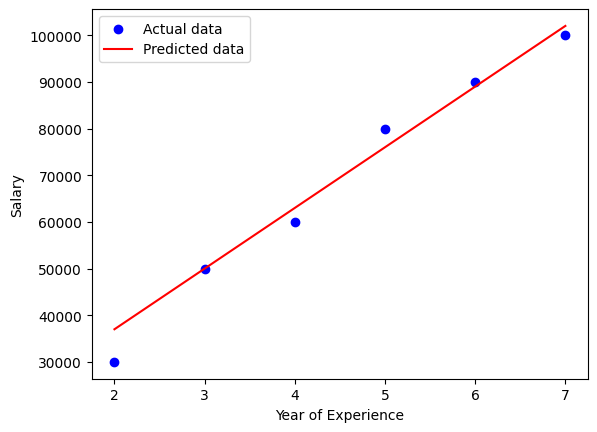

In [25]:
import matplotlib.pyplot as plt
plt.scatter(X,y,color='blue',label='Actual data')
plt.plot(X,model.predict(X),color='red',label='Predicted data')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [38]:
import numpy as np
import pandas as pd

# 1. Generate three independent numerical features
n_samples = 100
np.random.seed(42) # for reproducibility

X1 = np.random.rand(n_samples) * 5 # Feature 1
X2 = np.random.rand(n_samples) * 5  # Feature 2
X3 = np.random.rand(n_samples) * 20 # Feature 3

# 2. Define coefficients and an intercept term
beta_1 = 2.5
beta_2 = -1.2
beta_3 = 0.8
intercept = 5

# 3. Generate a dependent numerical target variable with random noise
noise = np.random.randn(n_samples) * 2
y = intercept + beta_1 * X1 + beta_2 * X2 + beta_3 * X3 + noise

# 4. Create a pandas DataFrame
data = {
    'Feature_1': X1,
    'Feature_2': X2,
    'Feature_3': X3,
    'Target': y
}
df = pd.DataFrame(data)

print("Generated DataFrame head:")
print(df.head())
print("\nDataFrame Info:")
df.info()

Generated DataFrame head:
   Feature_1  Feature_2  Feature_3     Target
0   1.872701   0.157146  12.840633  19.856826
1   4.753572   3.182052   1.682799  13.108505
2   3.659970   1.571780   3.232574  19.137736
3   2.993292   2.542853  17.971084  25.076512
4   0.780093   4.537832  12.128581   7.157414

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  100 non-null    float64
 1   Feature_2  100 non-null    float64
 2   Feature_3  100 non-null    float64
 3   Target     100 non-null    float64
dtypes: float64(4)
memory usage: 3.3 KB


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [40]:
X = df[['Feature_1', 'Feature_2', 'Feature_3']]

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ValueError: x and y must be the same size

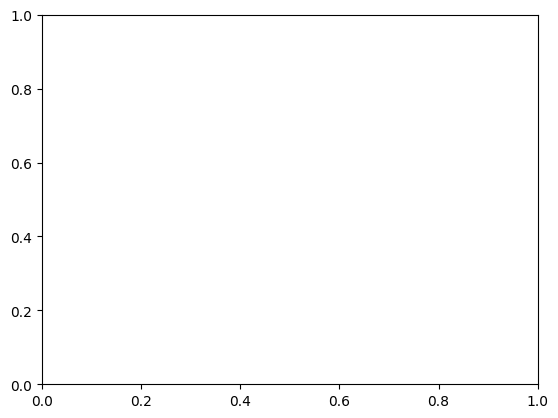

In [42]:
plt.scatter(X_scaled[:,0],X_scaled[:,],s=30,color='gray')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Scaled Features')
plt.legend()
plt.show()

In [43]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

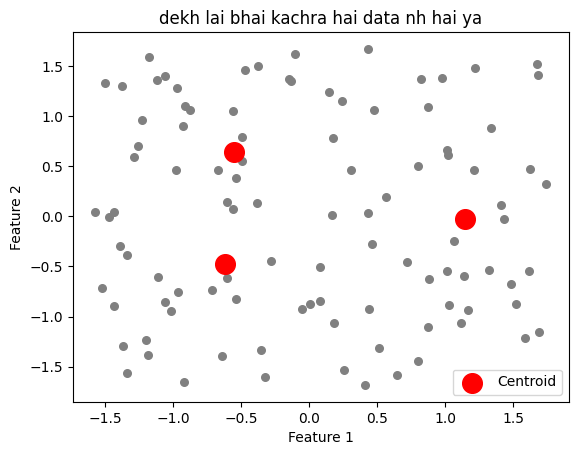

In [46]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],s=30,color='gray')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroid')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('dekh lai bhai kachra hai data nh hai ya')
plt.legend()
plt.show()

In [47]:
print(kmeans.inertia_)

165.38317482970558


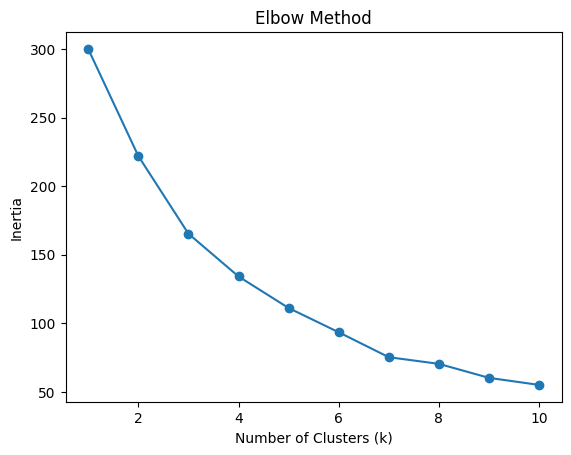

In [52]:
inertia=[]
k_values = range(1,11)
for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

plt.plot(k_values,inertia,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.show()

In [27]:
X = df[['Feature_1', 'Feature_2', 'Feature_3']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80, 3)
X_test shape: (20, 3)
y_train shape: (80,)
y_test shape: (20,)


In [28]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Multiple linear regression model trained successfully.")

Multiple linear regression model trained successfully.


In [29]:
y_pred = model.predict(X_test)
print("Predictions made on the test set.")

Predictions made on the test set.


In [30]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 8.41
R-squared: 0.94


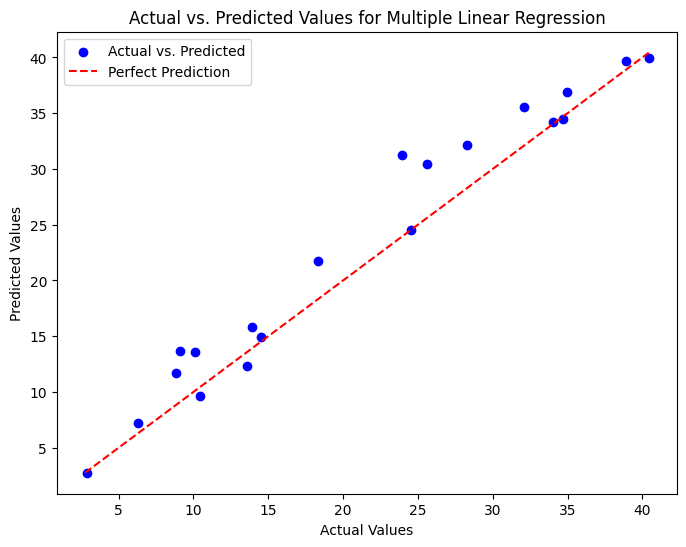

In [31]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')

# Add a line for perfect predictions
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Multiple Linear Regression')

# Add legend
plt.legend()

# Display the plot
plt.show()
